In [1]:
import pandas as pd


q = pd.read_csv(
    "demo\\network_community_detection\\demo_output\\adv\\csv_files\\karate_adv_solution.csv"
)
q = q.drop("ord", axis="columns")

In [2]:
q.describe()

,k,mod_score,energy,run_time
count,1.0,1.000000,1.000000,1.00000
mean,2.0,0.477886,-38.903846,6.26678
std,NaN,NaN,NaN,NaN
min,2.0,0.477886,-38.903846,6.26678
25%,2.0,0.477886,-38.903846,6.26678
50%,2.0,0.477886,-38.903846,6.26678
75%,2.0,0.477886,-38.903846,6.26678
max,2.0,0.477886,-38.903846,6.26678


In [3]:
l = pd.read_csv(
    "demo\\network_community_detection\\demo_output\\louvain\\csv_files\\karate_louvain_solution.csv"
)
l = l.drop("ord", axis="columns")

In [4]:
l.describe()

,k,mod_score,run_time
count,100.0,100.000000,100.000000
mean,2.0,0.653109,0.001841
std,0.0,0.004321,0.000963
min,2.0,0.636092,0.000980
25%,2.0,0.654195,0.001001
50%,2.0,0.654195,0.001999
75%,2.0,0.654195,0.002001
max,2.0,0.654195,0.006003


NameError: name 'l' is not defined

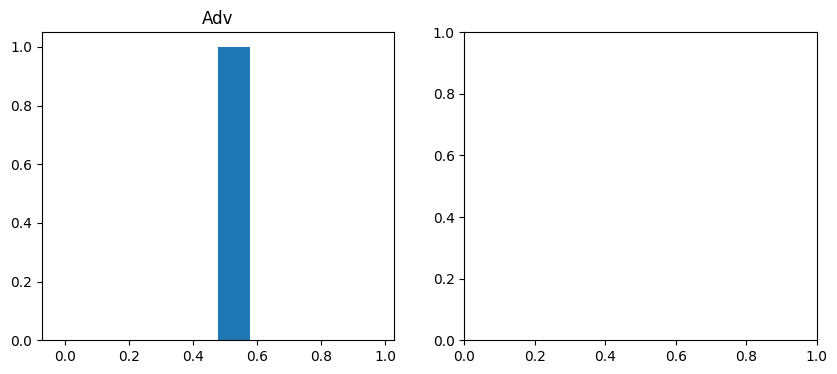

In [3]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

axes[0].hist(q.mod_score)
axes[0].set_title("Adv")
# axes[0].set_xticks(np.arange(0.63, 0.66, 0.01))

axes[1].hist(l.mod_score)
axes[1].set_title("Louvain")
axes[1].set_xticks(np.arange(0.63, 0.66, 0.01))